# Рубежный контроль №2
# Тема: Методы построения моделей машинного обучения

## Хижняков В.М. ИУ5-65Б

Загрузка необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('./HRDataset_v14.csv', sep=",")
TARGET_COL_NAME = 'RecruitmentSource'
TARGET_IS_NUMERIC = data[TARGET_COL_NAME].dtype != 'O'
TARGET_IS_NUMERIC

False

In [3]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [4]:
data.shape

(311, 36)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

### Удалим колонки, которые не влияют на целевой признак

Построим heatmap для лучшего визуального представления всез корреляций

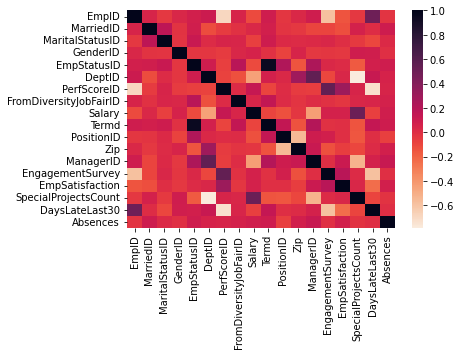

In [7]:
cmap = sns.cm.rocket_r
ax = sns.heatmap(data.corr(), cmap=cmap)

In [8]:
data = data.drop(columns=['Employee_Name', 'EmpID', 'DateofTermination', 'ManagerID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MarriedID                   311 non-null    int64  
 1   MaritalStatusID             311 non-null    int64  
 2   GenderID                    311 non-null    int64  
 3   EmpStatusID                 311 non-null    int64  
 4   DeptID                      311 non-null    int64  
 5   PerfScoreID                 311 non-null    int64  
 6   FromDiversityJobFairID      311 non-null    int64  
 7   Salary                      311 non-null    int64  
 8   Termd                       311 non-null    int64  
 9   PositionID                  311 non-null    int64  
 10  Position                    311 non-null    object 
 11  State                       311 non-null    object 
 12  Zip                         311 non-null    int64  
 13  DOB                         311 non

### Обработка пропусков

In [9]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed = {}

for col in data:
    contains_nan = data[col].isnull().sum() != 0
    if contains_nan:
        data_imp = data[[col]]
        data_imp = imp.fit_transform(data_imp)
        imputed[col] = data_imp

for col_name in imputed:
    df = pd.DataFrame({col_name:imputed[col_name].T[0]})
    data[col_name] = df.copy()

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MarriedID                   311 non-null    int64  
 1   MaritalStatusID             311 non-null    int64  
 2   GenderID                    311 non-null    int64  
 3   EmpStatusID                 311 non-null    int64  
 4   DeptID                      311 non-null    int64  
 5   PerfScoreID                 311 non-null    int64  
 6   FromDiversityJobFairID      311 non-null    int64  
 7   Salary                      311 non-null    int64  
 8   Termd                       311 non-null    int64  
 9   PositionID                  311 non-null    int64  
 10  Position                    311 non-null    object 
 11  State                       311 non-null    object 
 12  Zip                         311 non-null    int64  
 13  DOB                         311 non

### Кодирование строковых признаков (LabelEncoding)

In [10]:
not_number_cols = data.select_dtypes(include=['object'])
number_cols = data.select_dtypes(exclude=['object'])

In [11]:
le = preprocessing.LabelEncoder()

for col_name in not_number_cols:
    data[col_name] = le.fit_transform(data[col_name])
    
data

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,0,1,1,5,4,0,62506,0,19,...,3,17,5,0,4.60,5,0,13,0,1
1,1,1,1,5,3,3,0,104437,1,27,...,2,19,4,1,4.96,3,6,65,0,17
2,1,1,0,5,5,3,0,64955,1,20,...,3,15,5,1,3.02,3,0,117,0,3
3,1,1,0,1,5,3,0,64991,0,19,...,3,8,4,1,4.84,5,0,28,0,15
4,0,2,0,5,5,3,0,50825,1,19,...,3,20,3,1,5.00,4,0,43,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,1,5,3,0,65893,0,20,...,3,15,5,1,4.07,4,0,69,0,13
307,0,0,0,5,5,1,0,48513,1,19,...,3,4,3,3,3.20,2,0,135,5,4
308,0,0,0,1,3,4,0,220450,0,6,...,2,10,2,0,4.60,5,6,63,0,16
309,0,0,0,1,3,3,0,89292,0,9,...,2,19,2,1,5.00,3,5,44,0,11


### Масштабируем числовые данные

In [12]:
scaler = preprocessing.MinMaxScaler()

number_fields_source = number_cols.loc[:, number_cols.columns!=TARGET_COL_NAME] if TARGET_IS_NUMERIC else number_cols

for col_name in number_fields_source:
    data[col_name] = scaler.fit_transform(data[[col_name]])

data


,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0.0,0.00,1.0,0.0,0.8,1.000000,0.0,0.085190,0.0,0.620690,...,3,17,5,0,0.896907,1.00,0.000,13,0.000000,0.000000
1,1.0,0.25,1.0,1.0,0.4,0.666667,0.0,0.289777,1.0,0.896552,...,2,19,4,1,0.989691,0.50,0.750,65,0.000000,0.842105
2,1.0,0.25,0.0,1.0,0.8,0.666667,0.0,0.097139,1.0,0.655172,...,3,15,5,1,0.489691,0.50,0.000,117,0.000000,0.105263
3,1.0,0.25,0.0,0.0,0.8,0.666667,0.0,0.097315,0.0,0.620690,...,3,8,4,1,0.958763,1.00,0.000,28,0.000000,0.736842
4,0.0,0.50,0.0,1.0,0.8,0.666667,0.0,0.028197,1.0,0.620690,...,3,20,3,1,1.000000,0.75,0.000,43,0.000000,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.00,1.0,0.0,0.8,0.666667,0.0,0.101716,0.0,0.655172,...,3,15,5,1,0.760309,0.75,0.000,69,0.000000,0.631579
307,0.0,0.00,0.0,1.0,0.8,0.000000,0.0,0.016916,1.0,0.620690,...,3,4,3,3,0.536082,0.25,0.000,135,0.833333,0.157895
308,0.0,0.00,0.0,0.0,0.4,1.000000,0.0,0.855821,0.0,0.172414,...,2,10,2,0,0.896907,1.00,0.750,63,0.000000,0.789474
309,0.0,0.00,0.0,0.0,0.4,0.666667,0.0,0.215883,0.0,0.275862,...,2,19,2,1,1.000000,0.50,0.625,44,0.000000,0.526316


### Делим выборку на обучающую и тестовую

In [13]:
target = data[TARGET_COL_NAME]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [14]:
data_X_train.shape, data_y_train.shape

((248, 32), (248,))

In [15]:
data_X_test.shape, data_y_test.shape

((63, 32), (63,))

In [16]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### Метод опорных векторов

In [17]:
svr_1 = svm.LinearSVC()
svr_1.fit(data_X_train, data_y_train)

/Users/vadim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [18]:
data_y_pred_1 = svr_1.predict(data_X_test)
accuracy_score(data_y_test, data_y_pred_1)

0.19047619047619047

In [19]:
f1_score(data_y_test, data_y_pred_1, average='micro')

0.19047619047619047

In [20]:
f1_score(data_y_test, data_y_pred_1, average='macro')

0.10423280423280423

In [21]:
f1_score(data_y_test, data_y_pred_1, average='weighted')

0.1408583186360964

In [22]:
svr_2 = svm.LinearSVC(C=1.0, max_iter=10000)
svr_2.fit(data_X_train, data_y_train)

/Users/vadim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=10000)

In [23]:
data_y_pred_2 = svr_2.predict(data_X_test)
accuracy_score(data_y_test, data_y_pred_2)

0.25396825396825395

In [24]:
f1_score(data_y_test, data_y_pred_2, average='micro')

0.25396825396825395

In [25]:
f1_score(data_y_test, data_y_pred_2, average='macro')

0.2760141093474427

In [26]:
f1_score(data_y_test, data_y_pred_2, average='weighted')

0.290753338372386

In [27]:
svr_3 = svm.LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000)
svr_3.fit(data_X_train, data_y_train)

LinearSVC(dual=False, max_iter=10000, penalty='l1')

In [28]:
data_y_pred_3_0 = svr_3.predict(data_X_train)
accuracy_score(data_y_train, data_y_pred_3_0)

0.7943548387096774

In [29]:
data_y_pred_3 = svr_3.predict(data_X_test)
accuracy_score(data_y_test, data_y_pred_3)

0.5714285714285714

In [30]:
f1_score(data_y_test, data_y_pred_3, average='micro')

0.5714285714285714

In [31]:
f1_score(data_y_test, data_y_pred_3, average='macro')

0.5131972789115646

In [32]:
f1_score(data_y_test, data_y_pred_3, average='weighted')

0.5757105064247922

### Градиентный бустинг

In [33]:
ab1 = AdaBoostClassifier()
ab1.fit(data_X_train, data_y_train)
data_y_pred_1 = ab1.predict(data_X_test)
data_y_pred_1_0 = ab1.predict(data_X_train)
accuracy_score(data_y_train, data_y_pred_1_0)

0.7661290322580645

In [34]:
accuracy_score(data_y_test, data_y_pred_1)

0.6031746031746031

In [35]:
f1_score(data_y_test, data_y_pred_1, average='micro')

0.6031746031746031

In [36]:
f1_score(data_y_test, data_y_pred_1, average='macro')

0.634920634920635

In [37]:
f1_score(data_y_test, data_y_pred_1, average='weighted')

0.5149911816578483